In [1]:
# Import utilities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

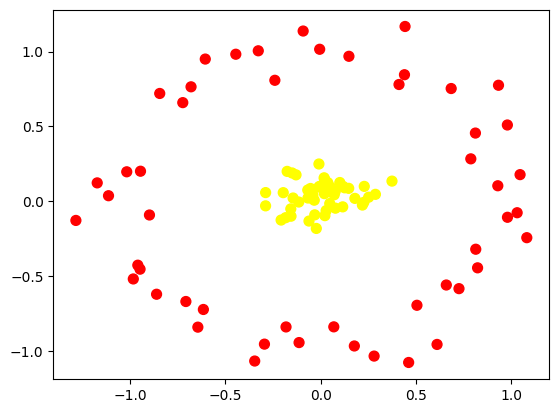

In [4]:
# Creating synthetic data that is not linearly separable

from sklearn.datasets import make_circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)

plt.scatter(X[:,0], X[:, 1], c = y, s = 50, cmap = 'autumn' )

In [5]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Build a SVM-C model to classify this data

from sklearn.svm import SVC # "Support Vector Classifier"

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
# Plotting :

def plot_svc_decision_function(model, ax = None, plot_support=True):
  """ Plot the decision function for a 2D SVC """
  if ax is None:
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #create grid to evaluate model

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundaries and margins

    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles=['--', '-','--'])

    #plot support vector
    if plot_support:
      ax.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth = 1, facecolors = 'none');
      
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



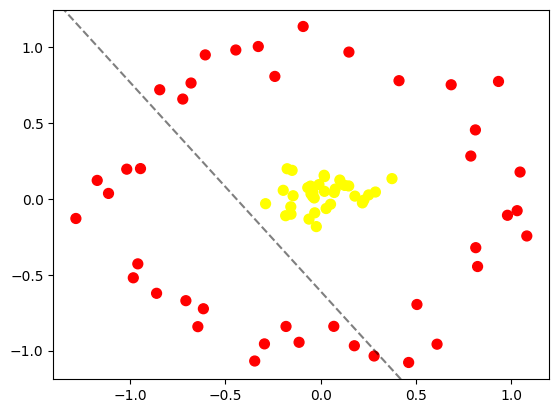

In [11]:
# plot decision boundary in case of training data

plt.scatter(X_train[:,0], X_train[:, 1], c = y_train, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

In [12]:
y_predict = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[ 9  0]
 [16  0]]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         9
           1       0.00      0.00      0.00        16

    accuracy                           0.36        25
   macro avg       0.18      0.50      0.26        25
weighted avg       0.13      0.36      0.19        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
